In [4]:
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\haoyuan\Documents\GitHub\CrystalDiff")

from CrystalDiff import util

In [3]:
miscut = np.deg2rad(5.)

A = np.array([2.5, 2.644])
n = np.array([ -np.sin(miscut), -np.cos(miscut)])

# Lattice distance for silicon 220 um
lattice = 192015.569 * 1e-9 

In [5]:
# Get bragg angle
energy = 10
wave_vec_in = util.kev_to_wave_number(energy=energy)

theta_bragg = np.arcsin( np.pi / lattice / wave_vec_in)

print("The bragg angle is {:.2f} degree.".format(np.rad2deg(theta_bragg)))

# Get k vector
k = np.array([np.cos(theta_bragg), np.sin(theta_bragg)])

# Loop through all d_vals
d_vals = np.linspace(start=0.5, stop=4.5, num=50)

C_holder = np.zeros((50, 2))
Bx_holder = np.zeros(50)
gap_holder = np.zeros(50)

for idx in range(50):
    
    d = d_vals[idx]
    
    # Get D
    D = np.array([d, 1.])
    
    # Get l
    l = np.dot(A - D, n) / np.dot(k, n)
    
    # Get point C
    C_holder[idx] = D + k * l
    
    # Get the x coordiante of B
    Bx_holder[idx] = d + 2 * l * np.cos(theta_bragg)
    
    # Get the gap
    gap_holder[idx] = l * np.sin(theta_bragg)

The bragg angle is 18.84 degree.


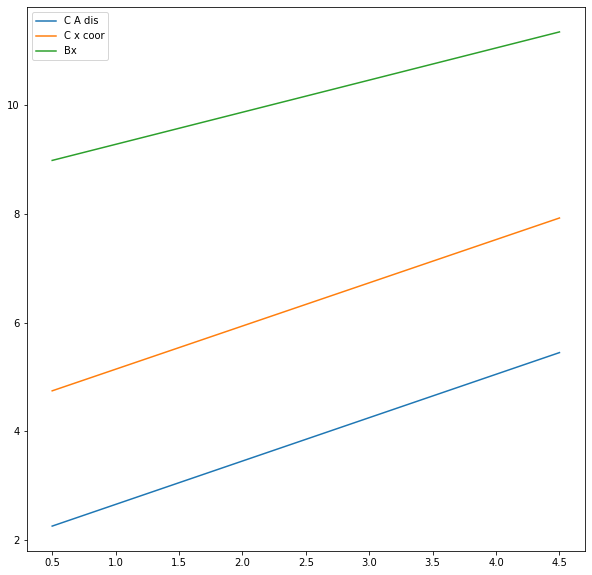

In [7]:
plt.figure(figsize=(10, 10))

plt.plot(d_vals, (C_holder[:,0] - 2.5) / np.cos(miscut), label="C A dis")
plt.plot(d_vals, C_holder[:,0], label = 'C x coor')
plt.plot(d_vals, Bx_holder, label="Bx")
#plt.plot(d_vals, gap_holder, label="gap")

plt.legend()
plt.show()